In [13]:
import pandas as pd
import numpy as np

In [12]:
rel_cols = ['id',
 'Q_id',
 'Q',
 'tipo_preg',
 'A',
 'label',
 'beto-label',
 'eq',
 'mispelling',
 'is correct?',
 'is correct the answer?']
gpt_comp = pd.read_excel("D:\github\coherence-prediction/beto_label_v7_comp_v2.xlsx")[rel_cols].set_index("id")

In [11]:
gpt_comp.groupby("tipo_preg").apply(lambda x: (x.shape[0]-x["label"].sum())/x.shape[0])

tipo_preg
0.0    0.718121
1.0    0.888889
2.0    0.684211
3.0    0.864686
4.0    0.687500
5.0    0.797203
dtype: float64

In [19]:
gpt_comp["Q_id tipo_preg".split()].drop_duplicates()["tipo_preg"].value_counts()

3.0    161
5.0     82
0.0     68
2.0     35
4.0      9
1.0      5
Name: tipo_preg, dtype: int64

In [27]:
"""0.0     68
1.0      5
2.0     35
3.0    161
4.0      9
5.0     82""".split()

['0.0', '68', '1.0', '5', '2.0', '35', '3.0', '161', '4.0', '9', '5.0', '82']

In [29]:
sum([float(x) for x in [ '68',  '5',  '35',  '161',  '9',  '82']])

360.0

In [30]:
[100*x/360 for x in [68.0, 5.0, 35.0, 161.0, 9.0, 82.0]]

[18.88888888888889,
 1.3888888888888888,
 9.722222222222221,
 44.72222222222222,
 2.5,
 22.77777777777778]

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
sns.set(font_scale=1) # for label size

Text(0.5, 0.98, 'Is correct?=False report (BETO-mt)')

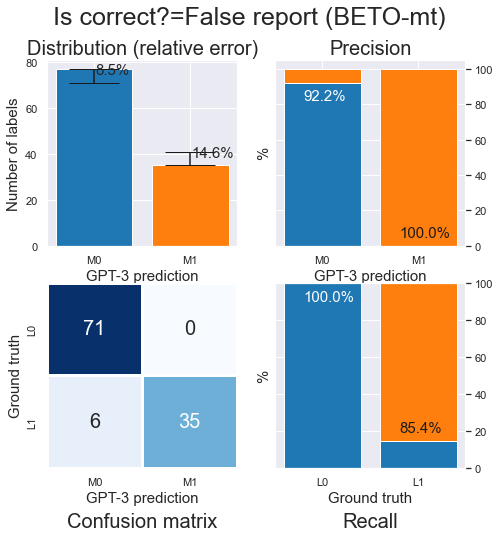

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(5*1.5, 5*1.5))

Q = 3
cfm_raw = gpt_comp[(gpt_comp['is correct the answer?'] == 0) & (gpt_comp["tipo_preg"] == Q)]["eq"].value_counts()
cfm = np.zeros((2, 2))
cfm[1, 1] = cfm_raw[1] if 1 in cfm_raw else 0
cfm[0, 0] = cfm_raw[5] if 5 in cfm_raw else 0
cfm[1, 0] = cfm_raw[25] if 25 in cfm_raw else 0
cfm[0, 1] = cfm_raw[100] if 100 in cfm_raw else 0
df_cfm = pd.DataFrame(cfm, columns="L0 L1".split(), index="M0 M1".split()).T
###
yerr = df_cfm.T.sum(axis=1).values-df_cfm.T.sum(axis=0).values
ax[0, 0].bar("M0 M1".split(), df_cfm.T.sum(axis=1), color =["tab:blue", "tab:orange"], width=0.8) 
ax[0, 0].bar("M0 M1".split(), df_cfm.T.sum(axis=1)-yerr/2, alpha=0, width=0.8, yerr=yerr/2, capsize=25) 
for i in range(2):
    yi = df_cfm.T.sum(axis=1)[i]-3*yerr[i]/8 if i == 0 else df_cfm.T.sum(axis=1)[i]-5*yerr[i]/8
    ax[0,0].annotate(str(np.round(-100*yerr[i]/df_cfm.T.sum(axis=0).values[i], 1)).replace("-", "")+"%",
                     xy =(i, 0),
                     xytext =(i+0.015, yi), size=15)
ax[0,0].set_title("Distribution (relative error)", size=20)
ax[0,0].set_ylabel("Number of labels", size=15)
ax[0, 0].set_xlabel("GPT-3 prediction", size=15);
###
pr = 100*df_cfm/df_cfm.sum(axis=0)
ax[0, 1].bar("M0 M1".split(), pr.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=pr.iloc[0])
ax[0, 1].bar("M0 M1".split(), pr.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
ax[0,1].set_title("Precision", size=20)
ax[0, 1].set_ylabel("%", size=15)
ax[0, 1].set_xlabel("GPT-3 prediction", size=15);
ax[0,1].annotate(str(np.round(pr.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, pr.iloc[0,0]-10), size=15, color="w")
ax[0,1].annotate(str(np.round(pr.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-pr.iloc[1,1])+5), size=15, color="k")
# ax[0, 1].yaxis.set_label_position("right")
ax[0, 1].yaxis.tick_right()
###
rl = 100*(df_cfm.T/df_cfm.T.sum(axis=0))
ax[1, 1].bar("L0 L1".split(), rl.iloc[1], color =["tab:orange", "tab:orange"], width=0.8, bottom=rl.iloc[0])
ax[1, 1].bar("L0 L1".split(), rl.iloc[0], color =["tab:blue", "tab:blue"], width=0.8)  
ax[1, 1].set_title("Recall", size=20, y=-0.35)
ax[1, 1].set_ylabel("%", size=15)
# ax[1, 1].yaxis.set_label_position("right")
ax[1, 1].set_xlabel("Ground truth", size=15);
ax[1,1].annotate(str(np.round(rl.iloc[0,0], 1))+"%",xy =(0, 0),xytext =(0-0.2, rl.iloc[0,0]-10), size=15, color="w")
ax[1,1].annotate(str(np.round(rl.iloc[1,1], 1))+"%",xy =(1, 0),xytext =(1-0.2, (100-rl.iloc[1,1])+5), size=15, color="k")
ax[1, 1].yaxis.tick_right()
###
sns.heatmap(df_cfm, ax=ax[1, 0], annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=3, cmap="Blues", cbar=False);
ax[1, 0].set_ylabel("Ground truth", size=15);
ax[1, 0].set_xlabel("GPT-3 prediction", size=15);
ax[1, 0].set_title("Confusion matrix", size=20, y=-0.35);
plt.suptitle(f"Is correct?=False report (BETO-mt)", size=25)